In [4]:
import dovpanda  # helper module to give you tips when using Pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import ttest_ind

## Load files

* =====(Line 1) Dataframe has 891 rows. Column Sex has only 2 values which suggests it's a boolean feature.
After df is created, Consider converting it to boolean by using df['Sex'] = (df['Sex'] == 'male') =====
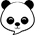

* =====(Line 1) Dataframe has 891 rows. Column Cabin has only 147 values which suggests it's a categorical feature.
After df is created, Consider converting it to categorical by using df['Cabin'] = df['Cabin'].astype('category') =====
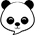

* =====(Line 1) Dataframe has 891 rows. Column Embarked has only 3 values which suggests it's a categorical feature.
After df is created, Consider converting it to categorical by using df['Embarked'] = df['Embarked'].astype('category') =====
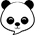

In [5]:
df_train = pd.read_csv('data/titanic/train.csv')

In [6]:
df_train['Sex'] = (df_train['Sex'] == 'male')
df_train.rename(columns={'Sex': 'is_male'}, inplace=True)
df_train['Cabin'] = df_train['Cabin'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')

In [7]:
df_train

,PassengerId,Survived,Pclass,Name,is_male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",True,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",False,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",False,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",True,26.0,0,0,111369,30.0000,C148,C


* =====(Line 3) You have called dropna with inplace=False.
This means the object itself will not change and the statement will have no effect. Assign the operation to a new variable or rewrite it as
.dropna(...,inplace=True) =====
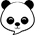

* =====(Line 941) You have called dropna with inplace=False.
This means the object itself will not change and the statement will have no effect. Assign the operation to a new variable or rewrite it as
.dropna(...,inplace=True) =====
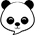

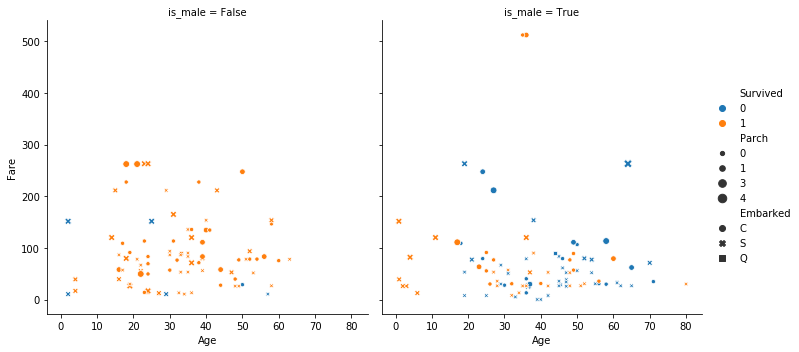

In [15]:
sns.relplot(x="Age", y="Fare", col="is_male",
            hue="Survived", style="Embarked", size="Parch",
            data=df_train.dropna());

## Clean

### Handle missing values

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   is_male      891 non-null    bool    
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: bool(1), category(2), float64(2), int64(5), object(2)
memory usage: 72.5+ KB


In [10]:
missing_age = df_train['Age'].isnull()
df_train[missing_age]

,PassengerId,Survived,Pclass,Name,is_male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",True,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",True,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",False,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",True,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",False,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",True,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",False,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",True,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",True,NaN,0,0,349217,7.8958,NaN,S


In [12]:
missing_cabin = df_train['Cabin'].isnull()
df_train[missing_cabin]

,PassengerId,Survived,Pclass,Name,is_male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",True,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",True,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",True,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",False,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",True,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",False,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Why are these values missing?

In [18]:
df_train['Embarked'][missing_age].value_counts()

S    90
Q    49
C    38
Name: Embarked, dtype: int64

In [19]:
df_train['Embarked'][~missing_age].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [44]:
ttest_ind(df_train['Survived'][missing_age], df_train['Survived'][~missing_age]).pvalue

0.005886534840075563

In [15]:
df_train['Embarked'][missing_cabin].value_counts()

S    515
C     99
Q     73
Name: Embarked, dtype: int64

In [17]:
df_train['Embarked'][~missing_cabin].value_counts()

S    129
C     69
Q      4
Name: Embarked, dtype: int64

In [63]:
df_train_dum = pd.get_dummies(df_train, columns=['Embarked'])

In [68]:
def compare_missing_columns(df, col_name, missing_values):
    a = df[col_name][missing_values]
    b = df[col_name][~missing_values]
    ttest = ttest_ind(a, b, nan_policy='omit') 
    pvalue = ttest.pvalue
    
    if pvalue < 0.05:    
        print(col_name, pvalue)

In [69]:
df_train_dum.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'is_male', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [73]:
for col_name in ['Survived', 'Pclass', 'is_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']:
    print('Age')
    compare_missing_columns(df_train_dum, col_name, missing_age)
    print('Cabin')
    compare_missing_columns(df_train_dum, col_name, missing_cabin)
    print('\n')

Age
Survived 0.005886534840075563
Cabin
Survived 3.090891039654821e-22


Age
Pclass 2.0591820872982796e-07
Cabin
Pclass 1.9171279401186437e-146


Age
Cabin
is_male 2.6041345254326915e-05


Age
Cabin
Age 1.297783597887407e-11


Age
Cabin


Age
Parch 0.00020431778278522634
Cabin


Age
Fare 0.002616756065905452
Cabin
Fare 4.852804964971382e-53


Age
Cabin
Embarked_C 3.279647663532837e-10


Age
Embarked_Q 3.6557131913829676e-25
Cabin
Embarked_Q 0.00010505787037349263


Age
Embarked_S 5.609721001522385e-13
Cabin
Embarked_S 0.000996674238234134




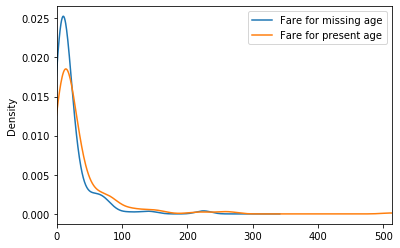

In [95]:
df_train_dum['Fare'][missing_age].plot.kde(label='Fare for missing age')
df_train_dum['Fare'][~missing_age].plot.kde(label='Fare for present age')
plt.xlim([0, df_train_dum['Fare'].max()])
plt.legend();

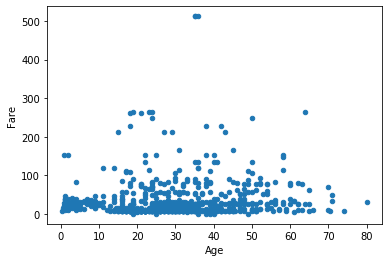

In [96]:
df_train_dum.plot(x='Age', y='Fare', kind='scatter')

In [101]:
df_train_dum['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [102]:
c_pclass = df_train_dum['Pclass']
c_pclass[c_pclass == 1] = 'red'
c_pclass[c_pclass == 2] = 'blue'
c_pclass[c_pclass == 3] = 'green'

<ipython-input-102-a08818781c34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_pclass[c_pclass == 1] = 'red'


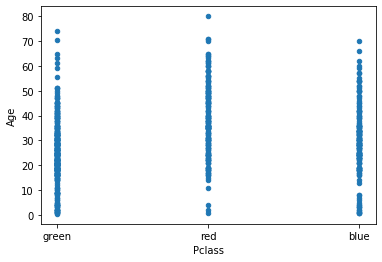

In [106]:
df_train_dum.plot(x='Pclass', y='Age', kind='scatter')

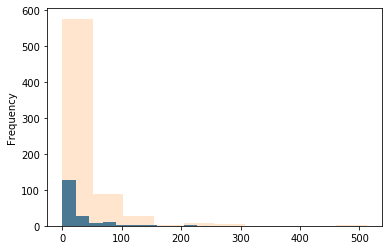

In [88]:
df_train_dum['Fare'][missing_age].plot.hist()
df_train_dum['Fare'][~missing_age].plot.hist(alpha=0.2)

## Visualize

## Machine learning

In [50]:
X = df_train.drop(['Survived', 'Name'], axis=1).values
y = df_train['Survived'].values

In [51]:
X

array([[1, 3, True, ..., 7.25, nan, 'S'],
       [2, 1, False, ..., 71.2833, 'C85', 'C'],
       [3, 3, False, ..., 7.925, nan, 'S'],
       ...,
       [889, 3, False, ..., 23.45, nan, 'S'],
       [890, 1, True, ..., 30.0, 'C148', 'C'],
       [891, 3, True, ..., 7.75, nan, 'Q']], dtype=object)

In [48]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,